# The Perceptron
![single neuron](images/single_neuron.jpg)
The perceptron is a linear binary classifier. It was implemented by [Rosenblatt](https://citeseerx.ist.psu.edu/doc_view/pid/65a83117cbcc4e6eb7c6ac5be8e61195dc84b9fc) as a model of a biological neuron. It can be used to find the linear separation between two classes. The linear separation is an hyperplane whose dimensions depends on the number of features used to discriminate the elements of the classes. In this notebook we will use the [Iris data set](https://archive.ics.uci.edu/ml/datasets/Iris)

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
print("numpy version: %s"%np.__version__)
print("pandas version: %s"%pd.__version__)

numpy version: 1.23.1
pandas version: 1.4.3


## The Iris data set
The Iris data set contains 150 records or three types of the Iris plant, 50 records for each class.

In [2]:
iris_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(iris_url, header=None, encoding='utf-8')
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df[4].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
num_setosa = len(df[df[4] == 'Iris-setosa'])
num_versicolor = len(df[df[4] == 'Iris-versicolor'])
num_virginica = len(df[df[4] == 'Iris-virginica'])
print('Number of samples:\nIris setosa {0:d}\nIris versicolor {1:d}\nIris virginica {2:d}\n'.format(num_setosa, num_versicolor, num_virginica))

Number of samples:
Iris setosa 50
Iris versicolor 50
Iris virginica 50



## Data pre-processing
We copy the data from the Pandas dataframe to NumPy arrays then we select two features to build our features matrix X that we will use to train and validate our model: petal length and petal width 

In [5]:
petal_length_col = 2
petal_width_col = 3
X = df.iloc[:, [petal_length_col, petal_width_col]].values # extract petal length and petal length
y = df.iloc[:, 4].values 
y = np.where(y == 'Iris-setosa', 0, y)
y = np.where(y == 'Iris-versicolor', 1, y)
y = np.where(y == 'Iris-virginica', 2, y)
y = y.astype(np.int64)
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


We split the data into two subsets: 70% of observations for the training set and 30% for the validation set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

The records of each type of the Iris plant dataset is now divided in a training set and a validation set

In [7]:
print('Labels count in y:', np.bincount(y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

Labels count in y: [50 50 50]
Labels count in y_train: [35 35 35]
Labels count in y_test: [15 15 15]


We transform the two subsets in order to be centered around their mean value and scaled by their standard deviation 

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Model training 
The activation function implemented by the scikit-learn Perceptron is the threshold function

$$y = \Biggl\{  \begin{matrix} 1 & wx + b > 0 \\ 0 & otherwise \end{matrix}$$

scikit-learn provides an implementation of the Perceptron. When the fit() function is called it runs a certain number of epochs till there is no improvement in the last 5 epochs (n_iter_no_change default value: 5) or the number epochs has reached the threshold set in max_iter (default value: 1000). 

In [17]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=10000, eta0=0.1, random_state=1, n_iter_no_change=100)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, max_iter=10000, n_iter_no_change=100, random_state=1)

## Model validation
We use the validation test to estimate the model performance. We compare the predictions made by the model on the test data set with the labels and count the number of missclassifications

In [18]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 2


A standard metric for classification tasks is the accuracy that is simply defined as 


$$accuracy = 1 - \frac{m}{s}$$

where m is the number of missclassifications and s the size of the validation set. 

In [19]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.956


The perceptron model does not converge if the data points are not separable that is the case of the Iris data set. This means we will always have some missclassification.  

## Data visualization
We can see that the data points in the Iris data set are not linearly separable by plotting them. In order to plot the data points and the separation lines we have to determine a rectangular box that contains all the data points using the two features selected to train the model, then we create a grid and compute the predictions for all of the data points in the grid. The predictions are used as the third coordinate of a contour plot. 

In [107]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

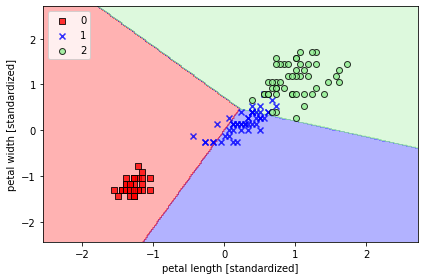

In [110]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()